In [45]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image as Image 
from numpy import asarray

In [46]:
pip install mtcnn

In [47]:
pip show mtcnn

Name: mtcnn
Version: 0.1.1
Summary: Multi-task Cascaded Convolutional Neural Networks for Face Detection, based on TensorFlow
Home-page: http://github.com/ipazc/mtcnn
Author: Iván de Paz Centeno
Author-email: ipazc@unileon.es
License: MIT
Location: /usr/local/lib/python3.7/dist-packages
Requires: keras, opencv-python
Required-by: 


In [48]:
import mtcnn
# print version
print(mtcnn.__version__)

0.1.0


In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
images_path = '/content/drive/MyDrive/Cher Eng Lim - images.zip (Unzipped Files)/images'
os.chdir(images_path)
%ls


'a guy_face1.jpeg'  'a guy_face5.jpeg'   pic01.jpg   pic05.jpg
'a guy_face2.jpeg'  'a guy_face6.jpeg'   pic02.jpg   pic06.jpeg
'a guy_face3.jpeg'  'a guy_face7.jpeg'   pic03.jpg
'a guy_face4.jpeg'  'a guy_face8.jpeg'   pic04.jpg


# Use `MTCNN` to detect faces

We load two images. One image has multiple faces on it and the other has only one face. 

In [51]:
from mtcnn.mtcnn import MTCNN

In [52]:
image1 = plt.imread('pic06.jpeg')
image2 = plt.imread('pic01.jpg')

Display the two images.

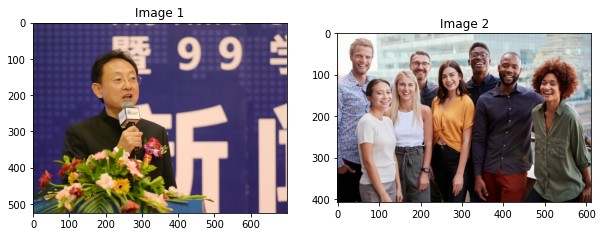

In [53]:
plt.figure(figsize = (10, 8))
ax1 = plt.subplot(1, 2, 1)
ax1.imshow(image1)
ax1.set_title("Image 1")

ax2 = plt.subplot(1, 2, 2)
ax2.imshow(image2)
ax2.set_title("Image 2")

plt.show()

Let's detect the face on the first image.

In [54]:
# First, create a detector 
detector = MTCNN()

# Second, use function detect_faces() of the detector
faces = detector.detect_faces(image1)

# Print the type of the result
print("Type of result: ", type(faces))

Type of result:  <class 'list'>


The result is a list. Let's see what information we have from the list.

- How many faces are detected?

In [55]:
print("Number of faces = ", len(faces))

Number of faces =  1


- What is inside that face?

In [56]:
faces[0]

{'box': [194, 104, 97, 136],
 'confidence': 0.9999305009841919,
 'keypoints': {'left_eye': (237, 159),
  'mouth_left': (245, 209),
  'mouth_right': (274, 206),
  'nose': (267, 178),
  'right_eye': (277, 156)}}

- `box`: It is a list. The first two numbers are the coordinates of the top left corner of the detected face. The next two numbers are `width` and `height` of the face.

- `keypoints`: It is a dictionary. It has $5$ items.  The `key` of each item is self-explanatory. The `value` of each item is the coordinates of the `key`.





Let's draw a rectangle on the face area as well as small circles at `keypoints`.

To draw a rectangle or a circle: use `Rectangle` and `Circle` of `patches` module of `matplotlib`. See this [link](https://matplotlib.org/api/patches_api.html?highlight=patch#module-matplotlib.patches).

This tutorial on [iterating over a list in Python](https://www.geeksforgeeks.org/iterate-over-a-list-in-python/) can be useful.

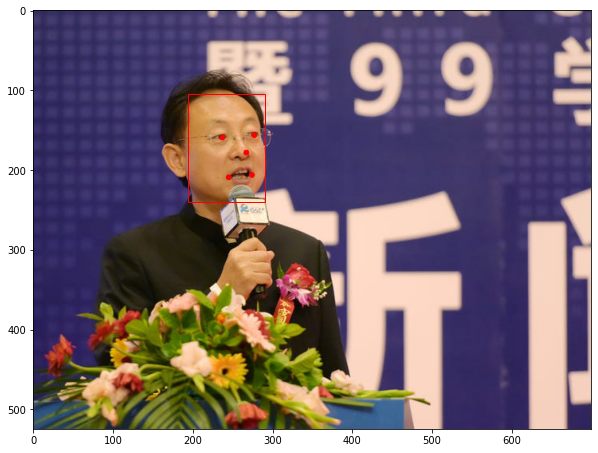

In [57]:
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle

plt.figure(figsize = (10, 8))
plt.imshow(image1)

ax = plt.gca()

# draw a rectangle on the detected face
x, y, width, height = faces[0]['box']
rect = Rectangle((x, y), width, height, fill = False, color = 'red')
ax.add_patch(rect)

# draw small circles
for key, value in faces[0]['keypoints'].items():
			cir = Circle(value, radius = 3, color='red')
			ax.add_patch(cir)

plt.show()

##Activity 1: Use MTCNN on the second images.

Firstly, detect faces and print out the number of detected faces.

In [58]:
faces = detector.detect_faces(image2)

In [59]:
print("Number of faces = ", len(faces))

Number of faces =  8


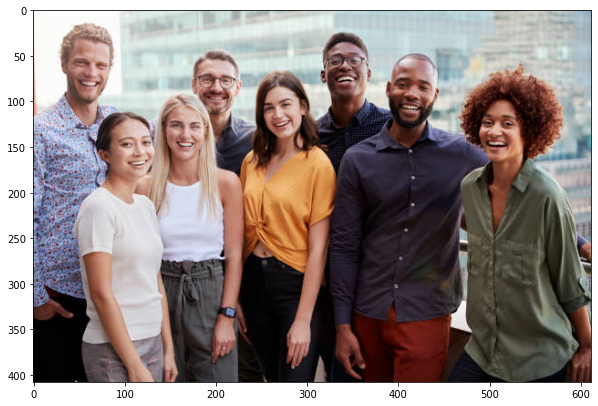

In [60]:
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle

plt.figure(figsize = (10, 8))
plt.imshow(image2)



Secondly, draw rectangles and circles on detected faces.

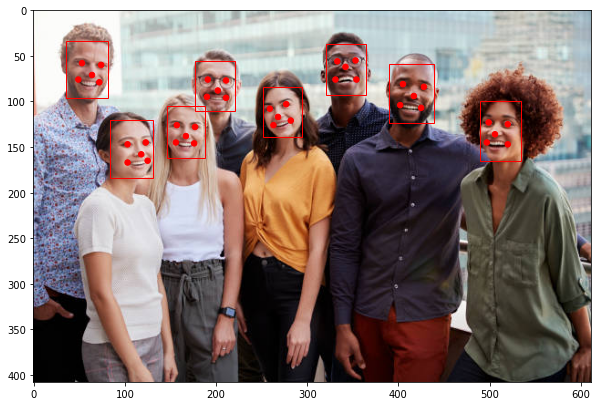

In [61]:
plt.figure(figsize = (10, 8))

plt.imshow(image2)

ax = plt.gca()

# draw a rectangle on the detected face

for i in range(len(faces)):
  x, y, width, height = faces[i]['box']
  rect = Rectangle((x, y), width, height, fill = False, color = 'red')
  ax.add_patch(rect)

# draw small circles

  for key, value in faces[i]['keypoints'].items():
	  cir = Circle(value, radius = 3, color='red')
	  ax.add_patch(cir)
  
plt.show()

##Activity 2: Let's combine everything into one function.

This function requires name of a file (with the assumption that the file exists in your current directory). The function is to detect faces in the image and draw rectangles surrounding the detected faces as well as circles on important points on the detected face.

In [62]:
def detect_faces_and_draw_rect_cir(filename):

  # read the image
  image = plt.imread(filename)

  # detect faces
  faces = detector.detect_faces(image)

  
  plt.figure(figsize = (10, 8))

  plt.imshow(image)

  ax = plt.gca()

  for i in range(len(faces)):
    # draw rectangles and circles
    x, y, width, height = faces[i]['box']
    rect = Rectangle((x, y), width, height, fill = False, color = 'red')
    ax.add_patch(rect)

    # draw small circles
    for key, value in faces[i]['keypoints'].items():
	    cir = Circle(value, radius = 3, color='red')
	    ax.add_patch(cir) 

  plt.show()

Test the programme with available images.

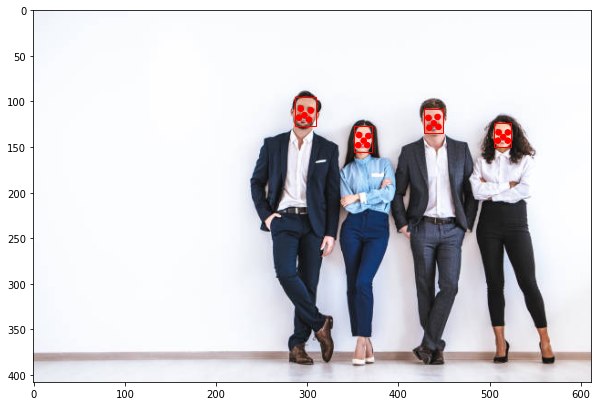

In [63]:
detect_faces_and_draw_rect_cir('pic02.jpg')

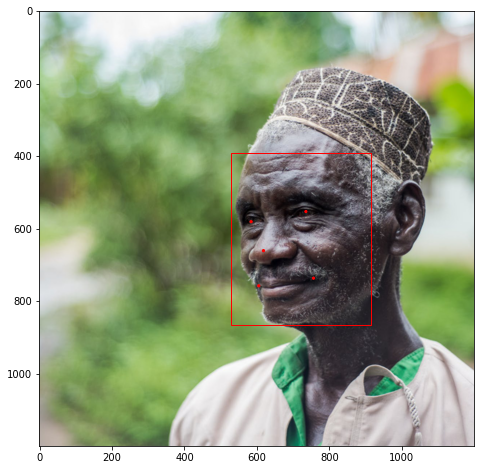

In [64]:
detect_faces_and_draw_rect_cir('pic03.jpg')

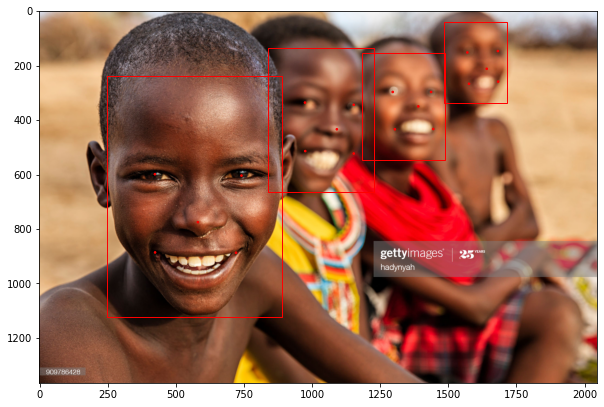

In [65]:
detect_faces_and_draw_rect_cir('pic04.jpg')

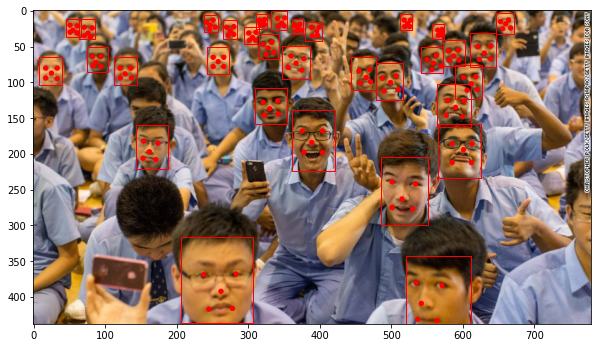

In [66]:
detect_faces_and_draw_rect_cir('pic05.jpg')

#Use MTCNN to detect faces and return and/or save faces for later use.

Inputs:
 - `filename`: name of the image
 - `required_size`: the detected faces are resized to `required_size`. Its default valus is $(160, 160)$
 - `save`: Its default value is `False`. If it is `True`, detected faces are saved.
 - `name`: prefix of saved names. 

Reference: 
- This link shows how you can [resize ](https://www.geeksforgeeks.org/python-pil-image-resize-method/)
- This link shows you how to [save a numpy array as an image](https://www.geeksforgeeks.org/convert-a-numpy-array-to-an-image/).

In [67]:
def detect_faces_and_draw_rect_cir(filename):

  # read the image
  image = plt.imread(filename)

  # detect faces
  faces = detector.detect_faces(image)

  # draw rectangles and circles
  plt.figure(figsize = (10, 8))

  plt.imshow(image)

  ax = plt.gca()

  for i in range(len(faces)):
    x, y, width, height = faces[i]['box']
    rect = Rectangle((x, y), width, height, fill = False, color = 'red')
    ax.add_patch(rect)

# draw small circles

    for key, value in faces[i]['keypoints'].items():
	    cir = Circle(value, radius = 3, color='red')
	    ax.add_patch(cir) 

  plt.show()

In [68]:
def detect_faces(filename, required_size = (160, 160), save = False, name = ""):

  # read the image
  image = plt.imread(filename)

  # detect faces
  faces = detector.detect_faces(image)

  list_of_face = []
  num_of_face = len(faces)

  for index, face in zip(range(len(faces)), faces):
    
    # extract the top left coner of the detected face
    x, y, width, height = face['box']

    # extract the face
    extracted_face = image[y: y+height+1, x: x+width+1, :]

    data = Image.fromarray(extracted_face) #convert from np to image 
    data = data.resize(required_size) #resize image

    back_to_np = np.asarray(data) #convert back to np
    # add the numpy array to the list
    list_of_face.append(back_to_np)

    if (save == True):
      filename = name + "_face" + str(index + 1) + ".jpeg"
      data.save(filename)

  return list_of_face

In [69]:
a = detect_faces('pic01.jpg', required_size = (160, 160), save = True, name = "a guy")

In [70]:
a[0].shape

(160, 160, 3)

#List all files in a directory

The below code is useful.

In [71]:
from os import walk
mypath = '/content/drive/MyDrive/Cher Eng Lim - images.zip (Unzipped Files)/images'

(_, _, filenames) = next(os.walk(mypath))
for i in filenames:
  print(i)

pic02.jpg
pic03.jpg
pic01.jpg
pic04.jpg
pic06.jpeg
pic05.jpg
a guy_face1.jpeg
a guy_face2.jpeg
a guy_face3.jpeg
a guy_face4.jpeg
a guy_face5.jpeg
a guy_face6.jpeg
a guy_face7.jpeg
a guy_face8.jpeg
